In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Training example

train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels[0]

9

In [7]:
train_data[0].shape

(28, 28)

In [9]:
!pip install matplotlib -q

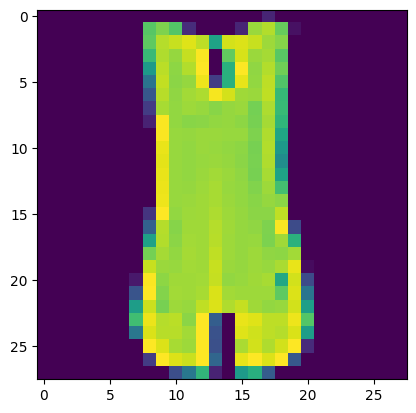

In [10]:
# Plot a sample

import matplotlib.pyplot as plt
plt.imshow(train_data[4])

In [11]:
train_labels[4]

0

In [12]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_name)

10

Text(0.5, 1.0, 'T-shirt/top')

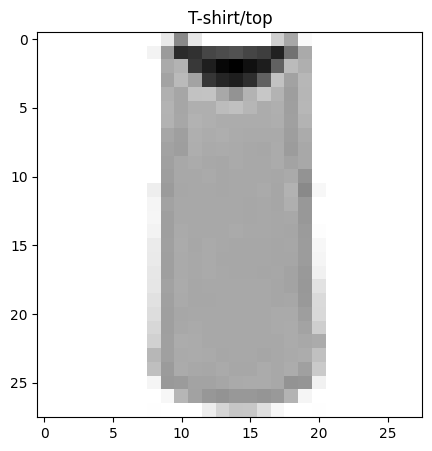

In [13]:
# Let's visualize an example

index_no = 2
plt.figure(figsize=(5,5))
plt.imshow(train_data[index_no], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_no]])

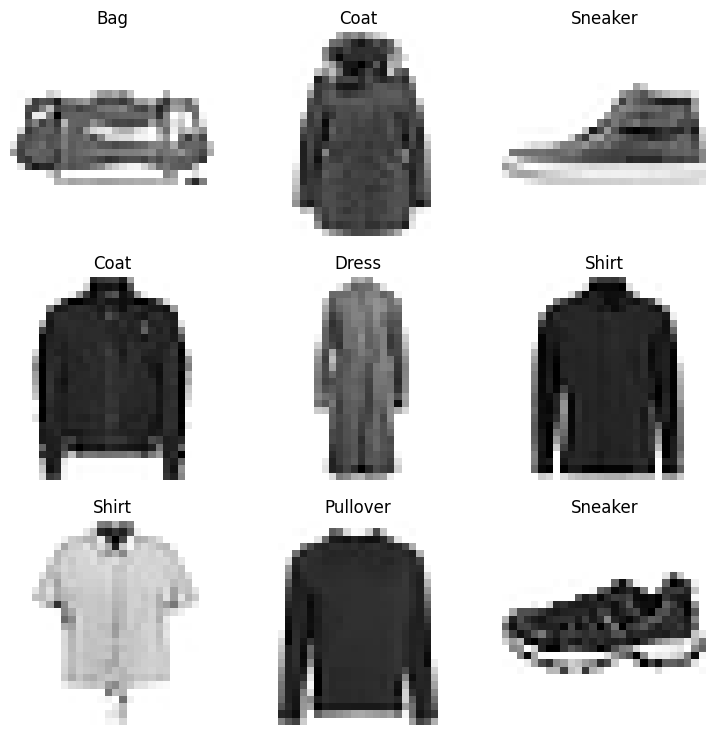

In [17]:
# Plot multiple random images of fashion MNIST

import random
n=3
plt.figure(figsize=(9, 9))
for i in range(9):
    ax = plt.subplot(n, n, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)

In [20]:
# Set random seed
tf.random.set_seed(13)
# Create the Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='Adam',
                metrics=['Accuracy']
              )
# Fit the model
# If you want to see training result set verbose=1, default is 1
history = model1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=0)

In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Check the max and min value
train_data.min(), train_data.max()

(0, 255)

In [23]:
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data.min(), train_data.max()

(0.0, 1.0)

In [24]:
# Set the random seed
tf.random.set_seed(13)
# Build the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the Model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='Adam',
                metrics=['Accuracy']
              )
# Fit the Model
history = model2.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels),verbose=1)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6906 - Accuracy: 0.3528 - val_loss: 1.4166 - val_Accuracy: 0.4433
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2713 - Accuracy: 0.5126 - val_loss: 1.1384 - val_Accuracy: 0.6054
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0309 - Accuracy: 0.6132 - val_loss: 0.9776 - val_Accuracy: 0.6237
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9335 - Accuracy: 0.6412 - val_loss: 0.9448 - val_Accuracy: 0.6319
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8948 - Accuracy: 0.6576 - val_loss: 0.9018 - val_Accuracy: 0.6591
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8671 - Accuracy: 0.6823 - val_loss: 0.8732 - val_Accuracy: 0.6907
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.8328 - Accuracy: 0.7096 - val_loss: 0.8413 - val_Ac

In [26]:
history.history

{'loss': [1.690610408782959,
  1.2713449001312256,
  1.0309065580368042,
  0.9334986209869385,
  0.8948380947113037,
  0.867058515548706,
  0.8328255414962769,
  0.808058500289917,
  0.7896201014518738,
  0.7747433185577393],
 'Accuracy': [0.35280001163482666,
  0.512583315372467,
  0.6132333278656006,
  0.6411833167076111,
  0.6575666666030884,
  0.682283341884613,
  0.7096166610717773,
  0.718916654586792,
  0.7246000170707703,
  0.7293166518211365],
 'val_loss': [1.4165873527526855,
  1.138433814048767,
  0.9775502681732178,
  0.9448159337043762,
  0.9018259048461914,
  0.8731741905212402,
  0.841316282749176,
  0.8210412263870239,
  0.8108778595924377,
  0.8016502261161804],
 'val_Accuracy': [0.4433000087738037,
  0.605400025844574,
  0.6237000226974487,
  0.6319000124931335,
  0.6590999960899353,
  0.6906999945640564,
  0.7113000154495239,
  0.7146000266075134,
  0.7174000144004822,
  0.723800003528595]}

<AxesSubplot: title={'center': 'Normalized data'}>

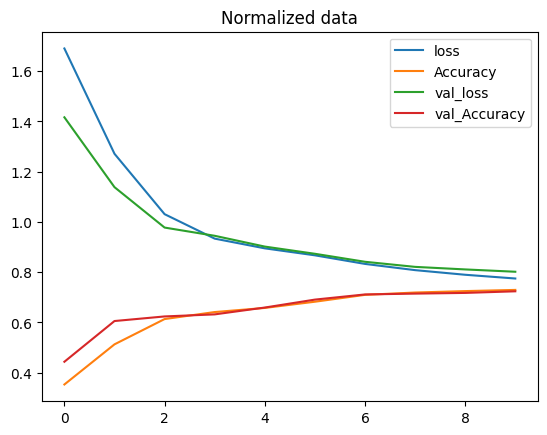

In [25]:
# Plot the loss curve
import pandas as pd
pd.DataFrame(history.history).plot(title = 'Normalized data')

In [27]:
# Set the random seed
tf.random.set_seed(13)
# Build the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
# Compile the Model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['Accuracy']
              )
# With each epoch it will increase the value of lr
callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Fit the model
history = model4.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels),callbacks=[callback], verbose=1)

Epoch 1/40
1875/1875 [==============================] - 14s 7ms/step - loss: 1.4711 - Accuracy: 0.4392 - val_loss: 1.1020 - val_Accuracy: 0.6269 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9783 - Accuracy: 0.6669 - val_loss: 0.8991 - val_Accuracy: 0.7049 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8449 - Accuracy: 0.7150 - val_loss: 0.8184 - val_Accuracy: 0.7236 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7907 - Accuracy: 0.7284 - val_loss: 0.7824 - val_Accuracy: 0.7329 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7616 - Accuracy: 0.7389 - val_loss: 0.7587 - val_Accuracy: 0.7425 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7446 - Accuracy: 0.7439 - val_loss: 0.7444 - val_Accuracy: 0.7427 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

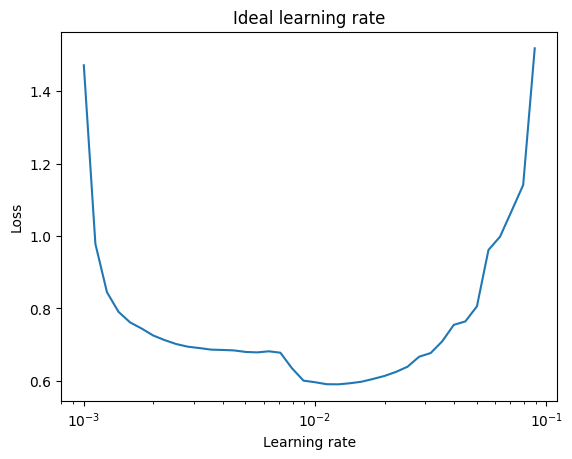

In [31]:
# Plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Ideal learning rate");

In [34]:
# Set the random seed
tf.random.set_seed(13)
# Build the model
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
# Compile the Model
model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['Accuracy']
              )
# Early Stopping
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
# Fit the Model
history = model5.fit(train_data, train_labels, epochs=100, validation_data=(test_data, test_labels), callbacks=[callback], verbose=1)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9614 - Accuracy: 0.6473 - val_loss: 0.7247 - val_Accuracy: 0.7266
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6687 - Accuracy: 0.7494 - val_loss: 0.6607 - val_Accuracy: 0.7619
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6224 - Accuracy: 0.7674 - val_loss: 0.6305 - val_Accuracy: 0.7709
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6000 - Accuracy: 0.7752 - val_loss: 0.6096 - val_Accuracy: 0.7740
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5869 - Accuracy: 0.7808 - val_loss: 0.6275 - val_Accuracy: 0.7647
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5782 - Accuracy: 0.7865 - val_loss: 0.5976 - val_Accuracy: 0.7841
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5680 - Accuracy: 0.7932 - val_loss: 0.5928 - val_Ac

In [35]:
y_pred = model5.predict(test_data)

313/313 [==============================] - 1s 1ms/step


In [36]:
y_pred[0].argmax(), class_name[y_pred[0].argmax()]

(9, 'Ankle boot')

In [37]:
# Convert all of the predictions from probabilities to labels

y_preds = y_pred.argmax(axis=1)
# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [41]:
!pip install scikit-learn -q 

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score, classification_report,ConfusionMatrixDisplay

# Check out the non-prettified confusion matrix

confusion_matrix(y_true=test_labels,
y_pred=y_preds)

array([[797,   0,   5,  85,   3,   6,  87,   0,  17,   0],
       [  1, 914,   5,  64,  12,   0,   3,   0,   1,   0],
       [ 24,   0, 594,  24, 103,   0, 248,   0,   7,   0],
       [ 68,   1,  16, 828,  16,   4,  62,   0,   4,   1],
       [  0,   0, 231,  29, 507,   0, 223,   0,   9,   1],
       [  0,   0,   0,   0,   1, 929,   0,  40,   5,  25],
       [213,   2,  87,  50,  60,   2, 546,   0,  40,   0],
       [  0,   0,   0,   0,   0,  53,   0, 912,   0,  35],
       [  9,   1,   0,   7,   3,  21,  26,   3, 929,   1],
       [  0,   0,   0,   1,   0,  33,   1,  49,   4, 912]], dtype=int64)

In [29]:
 import itertools

def custom_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    '''
    Creates a custom confusion matrix by comparing prediction and groud truth.
    If classes are not passed then it will take integer value
    Args:
    ================
    y_true: Array of True labels(shape should be same as y_pred)
    y_pred: Array of Predicted labels(shape should be same as y_true)
    classes: Array of class labels, default will be integer
    figsize: Size of output fig
    text_size: Size of output fig text(default 15)
    '''
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with
    #print(n_classes)
    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Reds) # colors will represent how 'correct'a class is, darker == better
    fig.colorbar(cax)
    # If there is a list of class
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    # Label the axes
    ax.set(title="Confusion Matrix",
            xlabel="Predicted label",
            ylabel="True label",
            xticks=np.arange(n_classes), # create enough axis slots for each class
            yticks=np.arange(n_classes),
            xticklabels=labels, # axes will labeled with class names (if they exist) or ints
            yticklabels=labels)
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

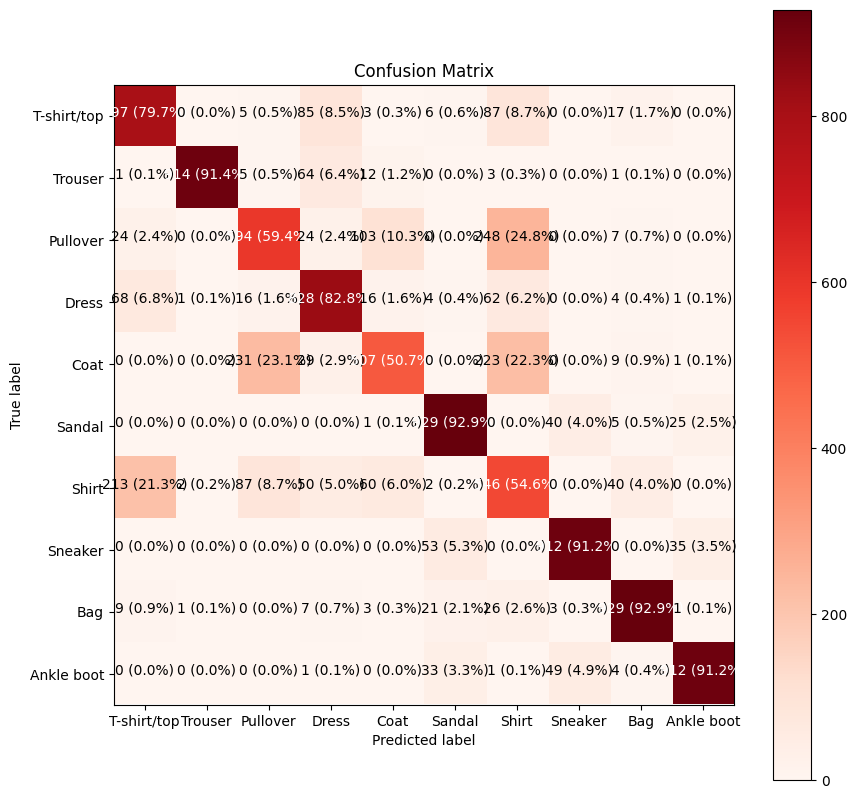

In [43]:
custom_confusion_matrix(
    y_true = test_labels,
    y_pred = y_preds,
    classes=class_name,
    text_size=10
)